# TESTE TÉCNICO DATA SCIENCE -- COGNITIVO-AI

### Rômulo Róseo Rebouças

### Análise exploratória para avaliar a consistência dos dados e identificar possíveis variáveis que impactam sua variável resposta.

### Opção: Modelagem para classificação do room type (feature ‘room_type’) com a utilização do Python:<br>


### O trabalho é composto das seguintes fases:<br>
  
#### 1) Análise dos dados <br>
* Verificação de atributos faltantes,<br>
* Verificação da necessidade de normalização ou padronização.<br>
* Verificação da necessidade de transformação para valores numéricos (one-hot-encoding), se precisar.<br>
* Analise das classes <br>
* Verificação da necessidade de balanceamento das classes<br>

#### 2) Modelagem:<br>
* Avaliação de resultados com base sem e com balanceamento<br>
* Aplicação dos classificadores Decision Tree, Bagging, Boosting e o Random Forest (RF) <br>
* Aplicação de rede neural (código disponível no arquivo Cognitivo-ai RNN.ipynb - feito no Colab ambiente Google)

#### 3) Conclusão:
* vide arquivo README.MD

## 1) Análise dos dados

In [1]:
##-- Importação dos pacotes
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
##-- Leitura do aquivo 
df = pd.read_csv("E:/CV/Processo Seletivo/Cognitivo-ai/listings.csv")

print (df.shape[0])
df.tail()

26615


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26610,48269503,Quarto inteiro no Recreio dos Bandeirantes.,389246322,Vivian,NaN,Recreio dos Bandeirantes,-23.01452,-43.46005,Private room,94,1,0,NaN,NaN,4,180
26611,48269534,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",122122028,Victor,NaN,Cidade de Deus,-22.95078,-43.35997,Entire home/apt,141,1,0,NaN,NaN,1,365
26612,48270411,BR-RJ020 Casa Niemeyer vista deslumbrante,13773093,Raphael,NaN,São Conrado,-22.99825,-43.25133,Entire home/apt,2500,3,0,NaN,NaN,1,360
26613,48270514,Casa Tijuca - Curtir e aproveitar o Rio,23737846,Lucas,NaN,Tijuca,-22.92816,-43.24319,Entire home/apt,160,5,0,NaN,NaN,3,269
26614,48276004,Rio Spot Homes D040,13580277,Marcio,NaN,Copacabana,-22.96482,-43.17428,Entire home/apt,316,1,0,NaN,NaN,59,159


In [3]:
#-- Verifica os tipos dos atributos
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.661500e+04,2.661500e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000,26615.000000,26615.000000
mean,2.526448e+07,1.006657e+08,NaN,-22.965837,-43.248533,742.589254,4.725268,12.146308,0.629190,9.665414,219.438174
std,1.573416e+07,1.090670e+08,NaN,0.034971,0.096296,5368.868834,19.102522,29.722813,0.876064,35.942124,141.525405
min,1.787800e+04,3.607000e+03,NaN,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.220219e+07,1.431500e+07,NaN,-22.984570,-43.304090,157.000000,1.000000,0.000000,0.090000,1.000000,88.000000
50%,2.374090e+07,6.026326e+07,NaN,-22.971700,-43.196210,280.000000,2.000000,2.000000,0.270000,1.000000,254.000000
75%,4.089613e+07,1.546962e+08,NaN,-22.951575,-43.186300,550.000000,4.000000,9.000000,0.850000,3.000000,363.000000
max,4.827600e+07,3.892463e+08,NaN,-22.749820,-43.104860,625216.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


In [5]:
#-- Verifica se possui dados duplicados
data = df.drop_duplicates(keep='first')
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.661500e+04,2.661500e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000,26615.000000,26615.000000
mean,2.526448e+07,1.006657e+08,NaN,-22.965837,-43.248533,742.589254,4.725268,12.146308,0.629190,9.665414,219.438174
std,1.573416e+07,1.090670e+08,NaN,0.034971,0.096296,5368.868834,19.102522,29.722813,0.876064,35.942124,141.525405
min,1.787800e+04,3.607000e+03,NaN,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.220219e+07,1.431500e+07,NaN,-22.984570,-43.304090,157.000000,1.000000,0.000000,0.090000,1.000000,88.000000
50%,2.374090e+07,6.026326e+07,NaN,-22.971700,-43.196210,280.000000,2.000000,2.000000,0.270000,1.000000,254.000000
75%,4.089613e+07,1.546962e+08,NaN,-22.951575,-43.186300,550.000000,4.000000,9.000000,0.850000,3.000000,363.000000
max,4.827600e+07,3.892463e+08,NaN,-22.749820,-43.104860,625216.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


## >> Não possui dados duplicados

In [6]:
data['neighbourhood_cod'] = data['neighbourhood'].astype("category").cat.codes
data['room_type_tgt'] = data['room_type'].astype("category").cat.codes

In [7]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_cod,room_type_tgt
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304,32,0
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10,62,0
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328,32,0
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207,62,0
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101,32,0


In [8]:
##-- Lista códigos do bairro
bairro_s = data['neighbourhood'].unique()
bairro_n = data['neighbourhood_cod'].unique()

map_bairro = dict(zip(bairro_s, bairro_n))
print("\nDicionário bairro:")
print(map_bairro)

##-- Lista tipos de quarto
room_type_s = data['room_type'].unique()
room_type_n = data['room_type_tgt'].unique()

map_room = dict(zip(room_type_s, room_type_n))
print("\nDicionário tipo de quarto:")
print(map_room)


Dicionário bairro:
{'Copacabana': 32, 'Ipanema': 62, 'Barra da Tijuca': 8, 'Flamengo': 44, 'Santa Teresa': 119, 'Gávea': 56, 'Leblon': 74, 'Jacarepaguá': 65, 'Campo Grande': 20, 'Laranjeiras': 73, 'Humaitá': 59, 'São Conrado': 126, 'Botafogo': 14, 'Centro': 25, 'Vidigal': 141, 'Santo Cristo': 120, 'Itanhangá': 64, 'São Cristóvão': 127, 'Maracanã': 81, 'Glória': 51, 'Tijuca': 132, 'Lagoa': 72, 'São Francisco Xavier': 128, 'Catete': 22, 'Pitangueiras': 101, 'Marechal Hermes': 82, 'Jardim Botânico': 67, 'Senador Camará': 123, 'Irajá': 63, 'Vargem Grande': 136, 'Recreio dos Bandeirantes': 109, 'Leme': 75, 'Anil': 5, 'Vargem Pequena': 137, 'Estácio': 43, 'Cosme Velho': 34, 'Gardênia Azul': 49, 'Taquara': 130, 'Bangu': 7, 'Urca': 135, 'Grajaú': 52, 'Joá': 71, 'Alto da Boa Vista': 2, 'Penha Circular': 98, 'Vila Isabel': 143, 'Jardim Sulacap': 70, 'Praça da Bandeira': 105, 'Encantado': 39, 'Rio Comprido': 113, 'Lins de Vasconcelos': 76, 'Cosmos': 35, 'Santíssimo': 121, 'Gamboa': 48, 'Bonsuces

In [9]:
data_out = data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'room_type_tgt']]
xdata = data_out.copy()
xdata.drop(columns=['room_type_tgt'], inplace=True)

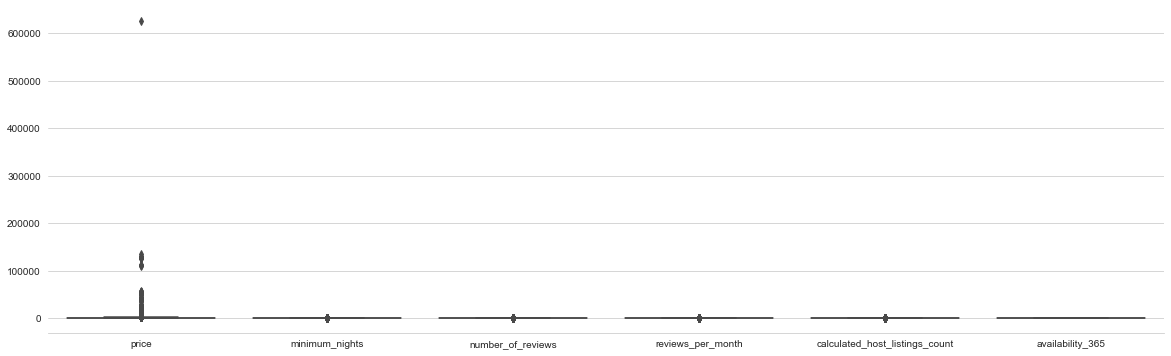

In [10]:
#-- Verificar outliers das variáveis
import seaborn as sns
sns.set_style("whitegrid")
f = plt.figure(figsize=(20,6))
f.tight_layout()
sns.boxplot(data=xdata, palette="deep")
sns.despine(left=True)

## -- A variável 'price' sugere outliers. Deve-se investigar e retirar possíveis outliers.

In [11]:
#-- Identificar e retirar os Outliers 
#-- Identificar e retirar os Outliers 
#-- Verifica outliers

def remove_nans_outliers(df, attributes, out_in=0):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            Q1 = df[var].quantile(0.25)
            Q2 = df[var].quantile(0.5)
            Q3 = df[var].quantile(0.75)
            IQR = Q3 - Q1
          
        if out_in==0 :
            # apenas inliers segundo IQR
            dfn = df.loc[(df[var] >= Q1-(IQR*1.5)) & (df[var] <= Q3+(IQR*1.5)), :]
        else:
            # apenas outliers segundo IQR
            dfn = df.loc[(df[var] < Q1-(IQR*1.5)) | (df[var] > Q3+(IQR*1.5)), :]
                
        dfn = dfn.loc[dfn[var].notnull(),:]
        
    return dfn

attributes = ['price']
data_n = remove_nans_outliers(data, attributes, 0)
data_out = remove_nans_outliers(data, attributes, 1)

print("Antes: %d, Depois remocao outliers: %d" % (data.shape[0], data_n.shape[0]))
print("Outliers: ", data_out.shape[0])

Antes: 26615, Depois remocao outliers: 23845
Outliers:  2770


room_type_tgt
0    2550
1       3
2     199
3      18
Name: room_type_tgt, dtype: int64


<Figure size 1440x432 with 0 Axes>

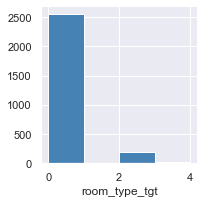

In [12]:
##-- Verificação da distribuição das classes (room_type) para os outliers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

f = plt.figure(figsize=(20,6))
f.tight_layout()
g = sns.FacetGrid(data_out,  margin_titles=True)
bins = np.linspace(0, 4, 5)
g.map(plt.hist, 'room_type_tgt', color="steelblue", bins=bins)
roomtype = data_out.groupby('room_type_tgt')
print (roomtype['room_type_tgt'].count())

### --  Verifica-se a predominância do tipo 'Entire home/apt' dentre os outliers.

## -- Segue estudo das variáveis sem outliers.

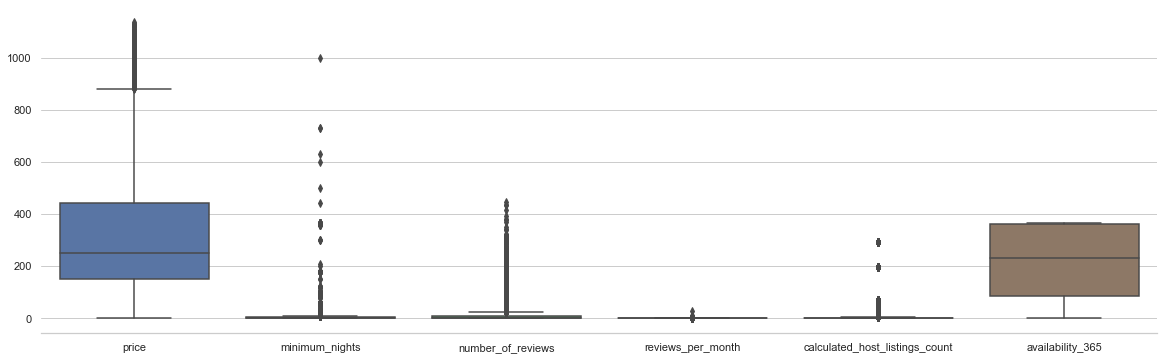

In [13]:
#-- Variáveis sem outliers 
import seaborn as sns

xdata = data_n[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

sns.set_style("whitegrid")
f = plt.figure(figsize=(20,6))
f.tight_layout()
sns.boxplot(data=xdata, palette="deep")
sns.despine(left=True)

In [14]:
##-- Dataset que será considerado para a modelagem
data_n.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_cod,room_type_tgt
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304,32,0
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10,62,0
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328,32,0
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207,62,0
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101,32,0


## -- O dataset "data_n" sem outliers será considerado para construção dos modelos. O atributo 'reviews_per_month' foi exluido para a modelagem por possuir aproximadamente 40% de seus valores nulos.

## -- Verificação de correlações entre as variáveis

In [15]:
##-- verificar correlação entre as variáveis
cabec_corr =['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
data_set = data_n[cabec_corr]

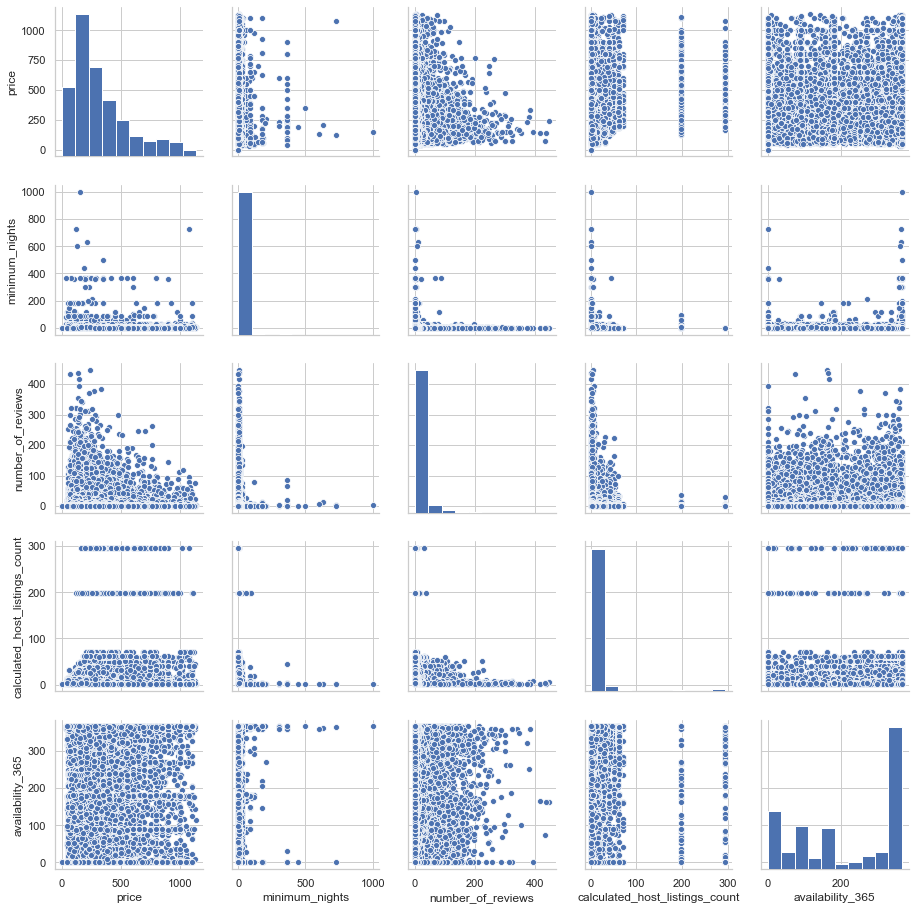

In [16]:
import seaborn as sns
sns.pairplot(data_set)

In [17]:
data_set.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.020744,-0.144194,0.069146,0.067785
minimum_nights,0.020744,1.000000,-0.030546,-0.023039,0.020406
number_of_reviews,-0.144194,-0.030546,1.000000,-0.059971,-0.068888
calculated_host_listings_count,0.069146,-0.023039,-0.059971,1.000000,0.052607
availability_365,0.067785,0.020406,-0.068888,0.052607,1.000000


## -- Verifica-se baixa correlação entre as variáveis. Portanto, não haverá eliminação de variáveis .


## --  Verificação da distribuição das classes da variável target: room_type

room_type_tgt
0    16735
1       96
2     6420
3      594
Name: room_type_tgt, dtype: int64


<Figure size 1440x432 with 0 Axes>

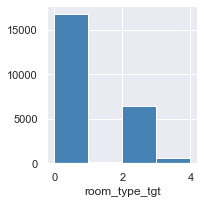

In [18]:
#-- Verificar a distribuição da variável target: room_type
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

f = plt.figure(figsize=(20,6))
f.tight_layout()
g = sns.FacetGrid(data_n,  margin_titles=True)
bins = np.linspace(0, 4, 5)
g.map(plt.hist, 'room_type_tgt', color="steelblue", bins=bins)
roomtype = data_n.groupby('room_type_tgt')
print (roomtype['room_type_tgt'].count())

In [19]:
data_n.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_cod,room_type_tgt
count,2.384500e+04,2.384500e+04,0.0,23845.000000,23845.000000,23845.000000,23845.000000,23845.000000,15856.000000,23845.000000,23845.000000,23845.000000,23845.000000
mean,2.588098e+07,1.037807e+08,NaN,-22.964649,-43.245371,328.967331,4.509709,13.292137,0.646835,9.403481,215.315789,52.478884,0.617236
std,1.569127e+07,1.106689e+08,NaN,0.035233,0.095197,245.505500,18.910774,31.044277,0.888403,35.942843,140.891517,35.988899,0.961373
min,1.787800e+04,3.607000e+03,NaN,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,1.285540e+07,1.448296e+07,NaN,-22.984120,-43.287460,150.000000,1.000000,0.000000,0.100000,1.000000,87.000000,32.000000,0.000000
50%,2.694611e+07,6.211486e+07,NaN,-22.970790,-43.194550,250.000000,2.000000,2.000000,0.290000,1.000000,233.000000,32.000000,0.000000
75%,4.107804e+07,1.620224e+08,NaN,-22.949010,-43.185690,443.000000,4.000000,10.000000,0.880000,3.000000,363.000000,72.000000,2.000000
max,4.827600e+07,3.892463e+08,NaN,-22.749820,-43.104860,1139.000000,1000.000000,446.000000,29.530000,295.000000,365.000000,150.000000,3.000000


In [20]:
cabec_pca = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod', 'room_type_tgt']
data_set = data_n[cabec_pca]

data_set = data_set.to_numpy()
nrow,ncol = data_set.shape
print (data_set.shape)

(23845, 7)


In [21]:
import random
random.seed(42) # define the seed (important to reproduce the results)

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
y = data_set[:,-1]
X = data_set[:,0:ncol-1]
print(X.shape)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

(23845, 6)


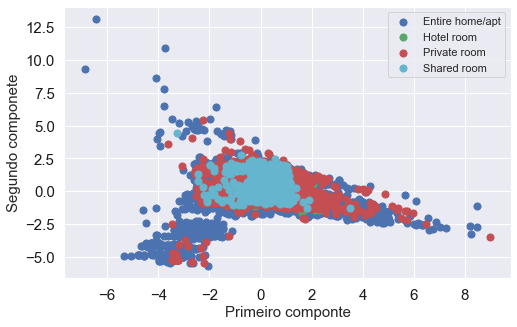

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    lb = c
    nodes = np.where(y == c)
    if lb == 0 : 
        lb = 'Entire home/apt'
    elif lb == 1 : 
        lb = 'Hotel room'
    elif lb == 2 : 
        lb = 'Private room'
    else:
        lb = 'Shared room'
        
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("Primeiro componte", fontsize=15)
plt.ylabel("Segundo componete", fontsize=15)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.show(True)

### -- Observa-se sobreposição de lasses. Para haja classificação adequada por algum método de classificação supervisionado devem ser mitigadas: a) informações complementares para identificação do tipo de quarto;  b) se o processo de classificação dos tipos de quarto pelo AirBnb é insuficiente (deveriam haver mais tipos);  c) existência de tendências ao tipo 'Entire home/apt" no cadastramento.

### -- A análise sugere o tratamento do desbalanceamento das classes.

## 2) Modelagem



## -- Modelagem sem balanceamento das classes

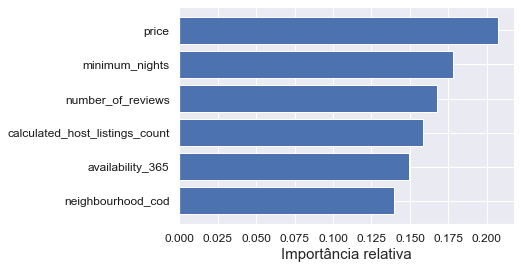

In [24]:
pca = PCA()

pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
# attributes >> valores salvos na leitura do aquivo
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(cabec_pca[i])
#plt.title('Valor da informação das variáveis', fontsize=15)
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Importância relativa',fontsize=15)
plt.xticks(color='k', size=12)
plt.yticks(color='k', size=12)

plt.show()

### -- Considerado o valor de informação das variáveis atravéis dos componentes oricnipais, para a modelagem de classificação serão consideradas as seguintes variáveis: 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' e 'neighbourhood_cod'.

In [25]:
cabec_pca = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod', 'room_type_tgt']
data_set = data_n[cabec_pca]

data_set = data_set.to_numpy()
nrow,ncol = data_set.shape
print (data_set.shape)

(23845, 7)


In [26]:
random.seed(42) # define the seed (important to reproduce the results)

y = data_set[:,-1]
X = data_set[:,0:ncol-1]
print(X.shape)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

(23845, 6)


In [27]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

models = [
        ('Tree Gini', tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)),
        ('Tree Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
        ('Bagging', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)) ,
        ('Boosting', AdaBoostClassifier(n_estimators=10,learning_rate=1, 
                         base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'))),
        ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
    ]

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

for name, model in models:
    model.fit (x_train, y_train)
    print ('Accuracy ({}): \t{}'.format (name, model.score(x_test,y_test)))
    

Accuracy (Tree Gini): 	0.7471167959739987
Accuracy (Tree Entropy): 	0.7462780457118893
Accuracy (Bagging): 	0.799119312224785
Accuracy (Boosting): 	0.7932480603900188
Accuracy (Random Forest): 	0.8117005661564269


### -- O classificador Random Forest (com o critério 'Gini') obeteve melhor acurácia (81%).

## -- Modelagem com tratamento de Balanceamento das classes

### --  Geração das bases balanceladas

In [28]:
from imblearn import over_sampling
from imblearn import under_sampling
from imblearn import combine
from imblearn.combine import SMOTEENN

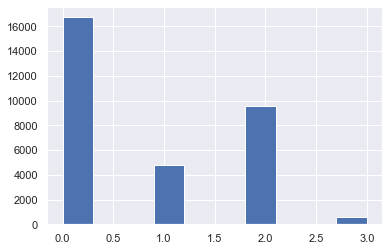

In [29]:
##-- Synthetic Minority Over-sampling Technique (SMOTE)
strategy = {1: int(X.shape[0]* 0.2), 2: int(X.shape[0]* 0.4)}
oversamp = over_sampling.SMOTE(random_state=42, sampling_strategy=strategy, k_neighbors=5 ) # sampling_strategy pode ser usado para casos binários
Xo, Yo = oversamp.fit_resample(X, y)
h = plt.hist(Yo)

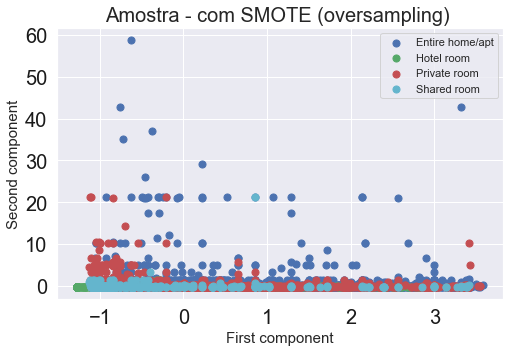

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)

scaler = StandardScaler().fit(Xo)
pca_result = scaler.transform(Xo)

classes = np.unique(Yo)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    nodes = np.where(Yo == c)
    lb = c
    
    if lb == 0 : 
        lb = 'Entire home/apt'
    elif lb == 1 : 
        lb = 'Hotel room'
    elif lb == 2 : 
        lb = 'Private room'
    else:
        lb = 'Shared room'
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=15)
plt.ylabel("Second component", fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.title('Amostra - com SMOTE (oversampling) ', fontsize=20)
plt.show(True)

In [31]:
models = [
        ('Tree Gini', tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)),
        ('Tree Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
        ('Bagging', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)) ,
        ('Boosting', AdaBoostClassifier(n_estimators=10,learning_rate=1, 
                         base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'))),
        ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
    ]

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(Xo, Yo, test_size = p, random_state = 42)

for name, model in models:
    model.fit (x_train, y_train)
    print ('Accuracy ({}): \t{}'.format (name, model.score(x_test,y_test)))
    

Accuracy (Tree Gini): 	0.7833438685208597
Accuracy (Tree Entropy): 	0.7835018963337548
Accuracy (Bagging): 	0.8320164348925411
Accuracy (Boosting): 	0.8154235145385588
Accuracy (Random Forest): 	0.8484513274336283


### -- Over-sampling (SMOTE): As acurácias dos classificadores referentes à base balanceada  foram melhores que as da base normal (sem balanceamento) 

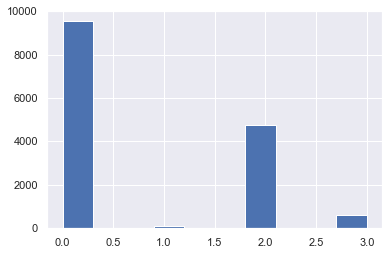

In [32]:
##-- Synthetic Minority Under-sampling Technique

strategy = {0: int(X.shape[0]* 0.4), 2: int(X.shape[0]* 0.2)}

undersamp = under_sampling.RandomUnderSampler(random_state=42,  sampling_strategy=strategy)
Xu, Yu = undersamp.fit_resample(X, y)
h = plt.hist(Yu)

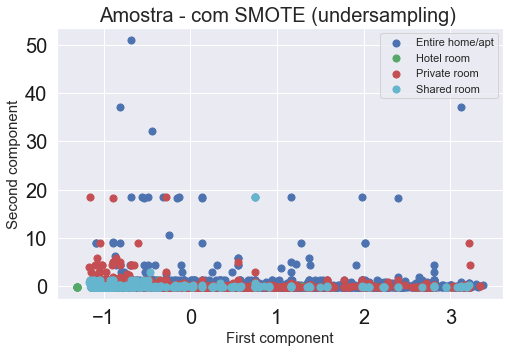

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)

scaler = StandardScaler().fit(Xu)
pca_result = scaler.transform(Xu)

classes = np.unique(Yu)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    lb = c

    if lb == 0 : 
        lb = 'Entire home/apt'
    elif lb == 1 : 
        lb = 'Hotel room'
    elif lb == 2 : 
        lb = 'Private room'
    else:
        lb = 'Shared room'
    nodes = np.where(Yu == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=15)
plt.ylabel("Second component", fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.title('Amostra - com SMOTE (undersampling) ', fontsize=20)
plt.show(True)

In [34]:
models = [
        ('Tree Gini', tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)),
        ('Tree Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
        ('Bagging', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)) ,
        ('Boosting', AdaBoostClassifier(n_estimators=10,learning_rate=1, 
                         base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'))),
        ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
    ]

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(Xu, Yu, test_size = p, random_state = 42)

for name, model in models:
    model.fit (x_train, y_train)
    print ('Accuracy ({}): \t{}'.format (name, model.score(x_test,y_test)))    

Accuracy (Tree Gini): 	0.686
Accuracy (Tree Entropy): 	0.691
Accuracy (Bagging): 	0.7493333333333333
Accuracy (Boosting): 	0.7323333333333333
Accuracy (Random Forest): 	0.7626666666666667


### -- Under-sampling: As acurácias dos classificadores foram piores que as da base normal (sem balanceamento) e ao da base balanceada Over-sampling (SMOTE).

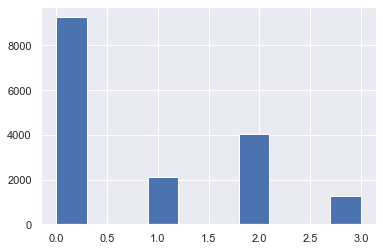

In [35]:
##-- SMOTEENN

strategy = {1: int(X.shape[0]* 0.1), 2: int(X.shape[0]* 0.4), 3: int(X.shape[0]* 0.1)}

overunder = combine.SMOTEENN(random_state=42,  sampling_strategy=strategy)
Xc, Yc = overunder.fit_resample(X, y)

h = plt.hist(Yc)

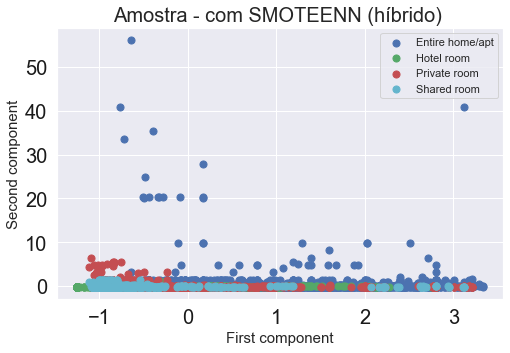

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)

scaler = StandardScaler().fit(Xc)
pca_result = scaler.transform(Xc)

classes = np.unique(Yc)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    lb = c

    if lb == 0 : 
        lb = 'Entire home/apt'
    elif lb == 1 : 
        lb = 'Hotel room'
    elif lb == 2 : 
        lb = 'Private room'
    else:
        lb = 'Shared room'
    nodes = np.where(Yc == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=15)
plt.ylabel("Second component", fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.title('Amostra - com SMOTEENN (híbrido) ', fontsize=20)
plt.show(True)

In [37]:
models = [
        ('Tree Gini', tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)),
        ('Tree Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
        ('Bagging', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101),
                          n_estimators=10)) ,
        ('Boosting', AdaBoostClassifier(n_estimators=10,learning_rate=1, 
                         base_estimator=tree.DecisionTreeClassifier(criterion = 'entropy'))),
        ('Random Forest', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
    ]

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(Xc, Yc, test_size = p, random_state = 42)

for name, model in models:
    model.fit (x_train, y_train)
    print ('Accuracy ({}): \t{}'.format (name, model.score(x_test,y_test)))    

Accuracy (Tree Gini): 	0.9219497607655502
Accuracy (Tree Entropy): 	0.9156698564593302
Accuracy (Bagging): 	0.9383971291866029
Accuracy (Boosting): 	0.9174641148325359
Accuracy (Random Forest): 	0.9572368421052632


### -- SMOTEENN (híbrido): As acurácias dos classificadores foram melhores que as da base normal (sem balanceamento) e as das bases balanceadas Over-sampling (SMOTE) e Under-sampling.

## Salvar bases

In [38]:
##-- Salva base de dados sem balanceamento
cabec = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod', 'room_type_tgt']

bd_SemBalanceamento = data_n[cabec]
bd_SemBalanceamento.to_pickle('E:/CV\Processo Seletivo/Cognitivo-ai/bd_SemBalanceamento.pkl')

In [39]:
##-- Salva cadastro balanceado - bd_oversampling
cabec = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod']

bd_oversampling = pd.DataFrame(Xo, columns=cabec)
bd_oversampling['room_type_tgt']= Yo
bd_oversampling.to_pickle('E:/CV\Processo Seletivo/Cognitivo-ai/bd_oversampling.pkl')

In [40]:
##-- Salva cadastro balanceado - bd_undersampling
cabec = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod']

bd_undersampling = pd.DataFrame(Xu, columns=cabec)
bd_undersampling['room_type_tgt']= Yu
bd_undersampling.to_pickle('E:/CV\Processo Seletivo/Cognitivo-ai/bd_undersampling.pkl')

In [41]:
##-- Salva cadastro balanceado - bd_SMOTEENN_Comb
cabec = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_cod']

bd_SMOTEENN_Comb = pd.DataFrame(Xc, columns=cabec)
bd_SMOTEENN_Comb['room_type_tgt']= Yc
bd_SMOTEENN_Comb.to_pickle('E:/CV\Processo Seletivo/Cognitivo-ai/bd_SMOTEENN_Comb.pkl')